In [82]:
# Needed to allow editing using PyCharm etc
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import os
path = os.getcwd()
if path == '/content':
    from google.colab import drive
    drive.mount('/content/gdrive')
    BASE_PATH = '/content/gdrive/My Drive/Level-4-Project/'
    !cd gdrive/My\ Drive/Level-4-Project/ && pip install --editable .
    os.chdir('gdrive/My Drive/Level-4-Project/')
    
elif path == 'D:\\Google Drive\\Level-4-Project\\notebooks\\raw_data_models':
    BASE_PATH = "D:/Google Drive/Level-4-Project/"
    
elif path == "/export/home/2192793m":
    BASE_PATH = "/export/home/2192793m/Level-4-Project/"
    
DATA_PATH = BASE_PATH + 'data/processed/raw_normalized/processed.pkl'

    
from src.data import load_data
from src.visualization import multiple_plots, visualize, plot_confusion_matrix

In [0]:
import numpy as np
import sys
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
import sys
from sklearn.metrics import classification_report, confusion_matrix
import csv
from keras.models import load_model
import pickle

In [0]:
# Needed as originally code was for theano backend but now using tensor flow
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
with open(DATA_PATH, "rb") as file:
    data = pickle.load(file)

In [0]:
def convert_label_to_int(label):
    if label == "walking":
        return 0
    if label == "pushing":
        return 1
    if label == "sitting":
        return 2
    if label == "pulling":
        return 3
    if label == "circling":
        return 4
    if label == "clapping":
        return 5
    if label == "bending":
        return 6

In [0]:
train_x = []
train_y = []
test_x = []
test_y = []
test_user = "A"
for user_letter, actions in data.items():
    for action, results in actions.items():
        for result in results:
            for row in result:
                if user_letter == test_user:
                    test_x.append(row)
                    test_y.append(convert_label_to_int(action))
                else:
                    train_x.append(row)
                    train_y.append(convert_label_to_int(action)) 
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)      

In [89]:
print(train_x.shape)

(47450, 512)


In [0]:
train_y = np_utils.to_categorical(train_y, nb_classes)
test_y = np_utils.to_categorical(test_y, nb_classes)

In [0]:
target_names = ["walking", "pushing", "sitting", "pulling", "circling", "clapping", "bending"]
nb_classes = len(target_names)
batch_size = 100
nb_epoch = 100

# input image dimensions
img_rows, img_cols = 75, 75

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D

In [77]:
'''
    model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(1, img_rows, img_cols), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
'''

"\n    model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(1, img_rows, img_cols), activation='relu'))\n    model.add(Convolution2D(64, (3, 3), activation='relu'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    model.add(Dropout(0.25))\n\n    model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))\n    model.add(Convolution2D(128, (3, 3), activation='relu'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    model.add(Dropout(0.25))\n\n    model.add(Flatten())\n    model.add(Dense(512, activation='relu'))\n    model.add(Dropout(0.5))\n"

In [0]:
def make_model(nb_classes):
    model = Sequential(name="basic_dnn")
    model.add(Dense(1024, input_dim=512, activation='relu'))
    model.add(Dense(512, activation='relu')) 
    model.add(Dense(512, activation='relu'))    
    model.add(Dense(512, activation='relu'))    
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# 100 epochs -> 0.35
def make_model(nb_classes):
    model = Sequential(name="basic_dnn")
    model.add(Dense(300, input_dim=512, activation='relu'))
    model.add(Dense(100, activation='relu'))    
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# 100 epochs -> 0.14
def make_model(nb_classes):
    model = Sequential(name="basic_dnn")
    model.add(Dense(512, input_dim=512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))  
    model.add(Dense(256, activation='relu'))    
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))  
    model.add(Dense(128, activation='relu'))   
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))   
    model.add(Dense(nb_classes, activation='softmax'))
    return model

In [0]:
# 20 epochs -> 0.14
def make_model(nb_classes):
    model = Sequential(name="basic_dnn")
    model.add(Dense(512, input_dim=512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))  
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))  
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))   
    model.add(Dense(nb_classes, activation='softmax'))
    return model

In [0]:
# 100 epochs -> 0.185
# 200 epochs -> 0.15 adam optimizer
def make_model(nb_classes):
    model = Sequential(name="basic_dnn")
    model.add(Dense(512, input_dim=512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))  
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))  
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))   
    model.add(Dense(nb_classes, activation='softmax'))
    return model

In [0]:
# SGD 0.001 100 epochs =-> 0.3 stable ish
def make_model(nb_classes):
    model = Sequential(name="basic_dnn")
    model.add(Dense(512, input_dim=512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))  
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))  
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))   
    model.add(Dense(nb_classes, activation='softmax'))
    return model

In [0]:
def train_model(train_data, train_labels, test_data, test_labels):
    model = make_model(nb_classes)
    print("model made")
    # train the model using SGD + momentum.
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    print("model compiled")
    history = model.fit(
        train_data,
        train_labels,
        batch_size=batch_size,
        epochs=nb_epoch,
        validation_data=(test_data, test_labels),
        shuffle=True, 
        verbose=1)
    return history
#     y_pred = model.predict_classes(test_data)
#     report = classification_report(np.argmax(data["test_labels"],axis=1), y_pred,target_names=target_names)
#     conf_matrix = confusion_matrix(np.argmax(data["test_labels"],axis=1), y_pred)
#     evaluation = model.evaluate(test_data, test_labels, batch_size=batch_size, verbose=0)
#     return {
#         "model": model,
#         "history": history,
#         "classification_report": report,
#         "confusion_matrix": confusion_matrix,
#         "evaluation": evaluation
#     }

In [121]:
history = train_model(train_x, train_y, test_x, test_y)

model made
model compiled
Train on 47450 samples, validate on 10220 samples
Epoch 1/100
47450/47450 [==============================] - 11s 233us/step - loss: 1.9549 - acc: 0.1522 - val_loss: 1.9456 - val_acc: 0.1814
Epoch 2/100
47450/47450 [==============================] - 10s 210us/step - loss: 1.9404 - acc: 0.1753 - val_loss: 1.9427 - val_acc: 0.2164
Epoch 3/100
47450/47450 [==============================] - 10s 211us/step - loss: 1.9332 - acc: 0.1909 - val_loss: 1.9419 - val_acc: 0.1820
Epoch 4/100
47450/47450 [==============================] - 10s 211us/step - loss: 1.9228 - acc: 0.2106 - val_loss: 1.9382 - val_acc: 0.1569
Epoch 5/100
47450/47450 [==============================] - 10s 207us/step - loss: 1.9033 - acc: 0.2313 - val_loss: 1.9528 - val_acc: 0.1492
Epoch 6/100
47450/47450 [==============================] - 10s 211us/step - loss: 1.8643 - acc: 0.2541 - val_loss: 1.9843 - val_acc: 0.1429
Epoch 7/100
47450/47450 [==============================] - 10s 209us/step - loss: 1.

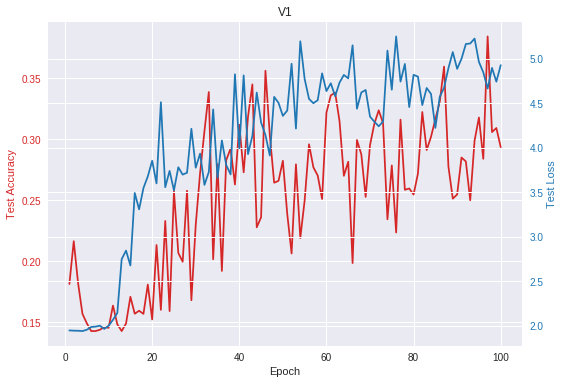

In [122]:
visualize.test_accuracy_test_loss_vs_epoch(history, "V1")

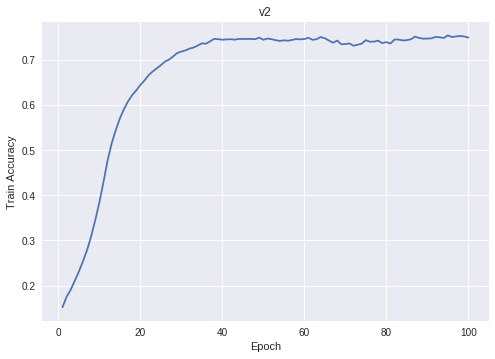

In [123]:
visualize.plot_train_acc(history, title="v2")

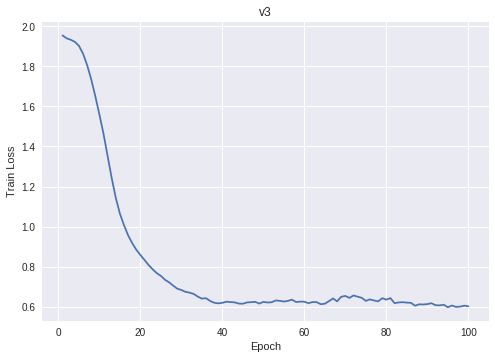

In [124]:
visualize.plot_train_loss(history, title="v3")